In [ ]:
# 4.Implement Simple and multiple linear regression for the data sets ‘student_score.csv’ 
# and ‘company_data .csv’ respectively.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data set contains details of no.of hours spend by students for studt and their marks
student = pd.read_csv('student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


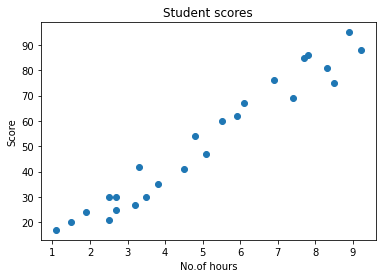

In [5]:
import matplotlib.pyplot as plt

Xax=student.iloc[:,0]
Yax=student.iloc[:,1]
plt.scatter(Xax,Yax)
plt.xlabel("No.of hours")
plt.ylabel("Score")
plt.title("Student scores")
plt.show()

In [6]:
#Perform the simple linear regression model
#Equation: Y=w0+w1.x
#Here Y(marks)=w0+w1.x
#Create x as hours and Y as marks

X = student.iloc[:, :-1]
y = student.iloc[:, 1]
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [7]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)

    Hours
13    3.3
11    5.9
18    6.1
22    3.8
8     8.3
16    2.5
24    7.8
3     8.5
12    4.5
14    1.1
0     2.5
10    7.7
15    8.9
4     3.5
7     5.5
5     1.5
2     3.2
19    7.4
17    1.9
23    6.9


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

2.339955743698276


In [10]:
print(regressor.coef_)

[9.88294529]


In [11]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 47 Predicted value : 52.74297671733691
Actual value : 88 Predicted value : 93.2630524020268
Actual value : 54 Predicted value : 49.77809313065229
Actual value : 30 Predicted value : 29.02390802385991
Actual value : 25 Predicted value : 29.02390802385991
Number of mislabeled points from test data set : 5


In [12]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 4.045587197742284
Mean Squared error : 19.130118221233708
Root Mean Squared error : 4.373799060454619


[0 1 2 3 4]


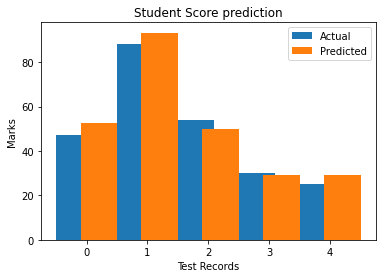

In [13]:
import matplotlib.pyplot as plt
c=X_test['Hours'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Test Records")
plt.ylabel("Marks")
plt.title("Student Score prediction")
plt.legend()
plt.show()

In [ ]:
#multiple linear regression for the data sets ‘student_score.csv’ and ‘company_data .csv’ respectively 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
advertising = pd.read_csv('Company_data.csv')
advertising.head()
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


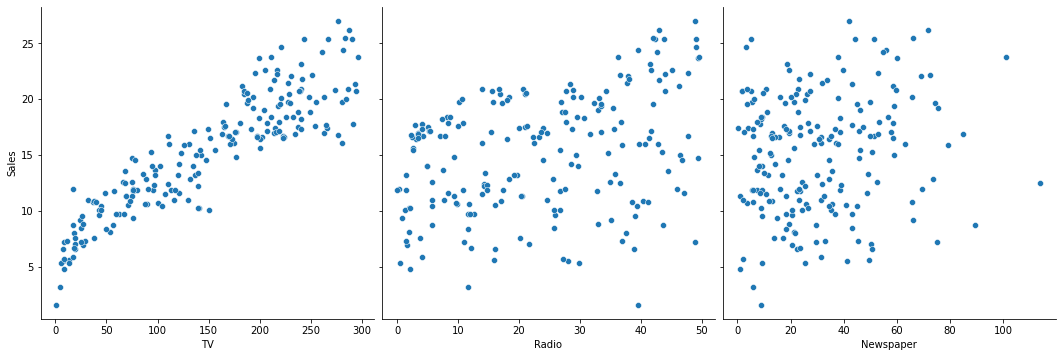

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [17]:
#perform the multiple linear regression model
#Equation : Y=w0+w1.x1 + w2.x2 + w3.x3
#Here Y(sales)=w0+w1.x1(TV)+w2.x2(Radio)+w3.x3(Newspaper)
#create x and Y as sales

X = advertising.iloc[:, :-1]
print(X)
y = advertising.iloc[:, -1]
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train)

        TV  Radio  Newspaper
20   218.4   27.7       53.4
120  141.3   26.8       46.2
40   202.5   22.3       31.6
196   94.2    4.9        8.1
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
160  172.5   18.1       30.7
173  168.4    7.1       12.8
16    67.8   36.6      114.0
169  284.3   10.6        6.4

[140 rows x 3 columns]


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

4.517653192410242


In [20]:
print(regressor.coef_)

[0.05481072 0.10931208 0.00083848]


In [21]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 17.2 Predicted value : 16.524862375392814
Actual value : 11.6 Predicted value : 12.108805558115433
Actual value : 11.8 Predicted value : 11.642522763122734
Actual value : 14.6 Predicted value : 13.948584462230732
Actual value : 10.1 Predicted value : 9.828058525311706
Actual value : 11.5 Predicted value : 11.943832762325378
Actual value : 11.0 Predicted value : 11.736768305205409
Actual value : 18.0 Predicted value : 17.508094757762052
Actual value : 18.4 Predicted value : 19.298775461516648
Actual value : 7.2 Predicted value : 7.115257022780462
Actual value : 11.0 Predicted value : 12.259483307989619
Actual value : 7.0 Predicted value : 7.962426522785122
Actual value : 10.3 Predicted value : 12.415607157614868
Actual value : 10.4 Predicted value : 10.902776853042933
Actual value : 11.9 Predicted value : 8.921186681154904
Actual value : 19.2 Predicted value : 19.067526135287707
Actual value : 20.7 Predicted value : 23.63953343392412
Actual value : 7.2 Predicted value : 1

In [22]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 1.1459882415688738
Mean Squared error : 2.5040681499147883
Root Mean Squared error : 1.582424769116936


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


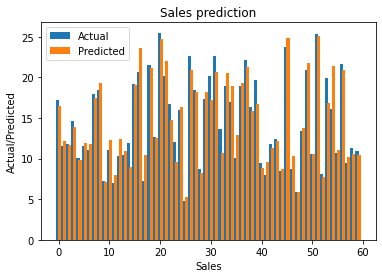

In [23]:
import matplotlib.pyplot as plt
c=X_test['TV'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Sales")
plt.ylabel("Actual/Predicted")
plt.title("Sales prediction")
plt.legend()
plt.show()